# Proyecto: Análisis de mercado inmobiliario + Ingenieria de features y modelos avanzados.

Aplica transformación de datos y entrena Modelos Avanzados para desarrollar con mayor profundidad tu modelo de Machine Learning:
* En la Parte 1, Transformacion de datos.
* En la Parte 2, Modelos avanzados.
* En la Parte 3, Interpretacion de modelos.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).



## Pipeline

### Parte 1, Transformacion de datos.

1. Transformacion de los datos:
    * Analisis de propiedades
    * Deteccion de nulls.
    * Imputacion de valores faltantes.
    * Eliminacion de instancias con datos contradictorios o poca cantidad de datos.


2. Detección y eliminación de Outliers:
   * Determinar outliers para Bathrooms y rooms
       * Regla de los 3 sigmas ( si no hay mucha varianza )
   * Para superficie total determinamos outliers con reglas de diseño.
   * Creamos un boxpolot con alguna propiedad
       * 3 box-plots


3. Encoding: transformamos las variables categoricas en numeros: barrio (l3) y tipo de propiedad.

4. Train-test.

5. Escalado de datos: todos los datos salvo el price.

6. Reduccion de dimensionalidad


### Parte 2, Modelos avanzados.

7. Benchmark: Ver Arbol de decision proyecto 1 y compararlo con proyecto 2. Usar los mismos hiperparametros.

8. Modelos de ensamble:
    * 



## 1. Transformacion de los datos.

En esta sección, Continuamos con el Análisis Exploratorio de Datos realizados en el proyecto 1. Debemos elegir cual de las siguientes tareas es apropiada para este dataset e implementar la transformacion

* Detección y eliminación de Outliers
* Encoding
* Imputación de valores faltantes
* Escalado de datos
* Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Importamos librerias utiles para trabajar.

In [1]:
# 1 Importar liberias utilesimport numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
class utils:
    @staticmethod
    def open_csv(path):
        return pd.read_csv(path)

    @staticmethod
    def graph_by_property_value(property_name, property_value, order_array, ax1,ax2):
        a = sns.countplot(data = dataset[dataset.l2 == property_value],y=property_name, palette="Set3",ax=ax[ax1,ax2], order=order_array)
        a.set_title(property_value)
    
    @staticmethod
    def split(features,obj,test_size):
        X_train, X_test, Y_train, Y_test = train_test_split(features, obj, 
                                                            test_size=test_size, 
                                                            random_state=42)
        return X_train, X_test, Y_train, Y_test
    
    
    @staticmethod
    def calculate_rmse(model, X_train, X_test, Y_train, Y_test):
        Y_train_pred = model.predict(X_train)
        Y_test_pred = model.predict(X_test)
        
        rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
        
        print(f'Err Train: {rmse_train}')
        print(f'Err Test: {rmse_test}')

    @staticmethod
    def rmse_graph(model, X_train, X_test, Y_train, Y_test):
        Y_train_pred = model.predict(X_train)
        Y_test_pred = model.predict(X_test)
        
        rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
        
        print(f'Err Train: {rmse_train}')
        print(f'Err Test: {rmse_test}')

        plt.figure(figsize = (10,4))
        
        sns.distplot(Y_train - Y_train_pred, bins = 20, label = 'train')
        sns.distplot(Y_test - Y_test_pred, bins = 20, label = 'test')
        
        plt.xlabel('Errores')
        plt.legend()

    
    @staticmethod
    def decision_tree(title, depths, X_train, X_test, Y_train, Y_test):
        #Define error list
        err_train = []
        err_test = []
        for depth in depths:
            
            #Define DesitionTreeRegresson and fit it
            a = DecisionTreeRegressor(max_depth = depth, random_state = 42)
            a.fit(X_train, Y_train)
            
            #try
            Y_train_pred = a.predict(X_train)
            train_err = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
            
            Y_test_pred = a.predict(X_test)
            test_err = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

            #save the error
            err_train.append(train_err)
            err_test.append(test_err)
         
        plt.plot(depths, err_train,'o-',label='train' )
        plt.plot(depths, err_test, 'o-',label='test')
        plt.legend()
        plt.title(title)
        plt.xlabel('depths')
        plt.ylabel('error')
    

    @staticmethod
    def knn(titulo, k_vecinos, X_train, X_test, y_train, y_test):
        # Definimos las listas vacias para los valores de error deseados
        lista_error_train = []
        lista_error_test = []

        for k in k_vecinos:
            # Definir el modelo con el valor de vecinos deseado
            clf = KNeighborsRegressor(n_neighbors= k)

            # Entrenar el modelo
            clf.fit(X_train, y_train)

            # Predecir y evaluar sobre el set de entrenamiento
            y_train_pred = clf.predict(X_train)
            train_err = np.sqrt(mean_squared_error(y_train, y_train_pred))

            # Predecir y evaluar sobre el set de evaluación
            y_test_pred = clf.predict(X_test)
            test_err = np.sqrt(mean_squared_error(y_test, y_test_pred))

            # Agregar la información a las listas
            lista_error_train.append(train_err)
            lista_error_test.append(test_err)

        plt.plot(k_vecinos, lista_error_train,'o-',label='train' )
        plt.plot(k_vecinos, lista_error_test, 'o-',label='test')
        plt.legend()
        plt.title(titulo)
        plt.xlabel('k_vecinos')
        plt.ylabel('error')
        plt.ylabel('error')

Cargamos el Dataset. Si no se encuentra el dataset, descomprimir zip ubicado en /Datasets. Realizamos una aproximación al dataset, mostrando las primeros cinco instancias.

In [3]:
# 2. Cargar dataset, informacion general.
path = "Datasets/DS_Proyecto_01_Datos_Properati.csv"
dataset = pd.read_csv(path)
dataset.head()
dataset.shape

(146660, 19)

### 1.1 Analisis de propiedades

#### Rooms
* En Argentina, cuando se habla de un departamento 3 ambientes, significa que le departamento tiene tres espacios de permanencia, es decir, no contamos los espacios de serivicio como cocina, baño, lavadero o cochera.

* Descripcion obtenida del sitio web de properati:
    * rooms - Cantidad de ambientes (útil en Argentina).
    * bedrooms - Cantidad de dormitorios (útil en el resto de los países).
    * bathrooms - Cantidad de baños.
    
* Asumo que bathrooms no esta incluido en rooms, pero que bedrooms si lo esta, dado que en algunos casos bedrooms + bathrooms es mayor que rooms.

#### Reglas de diseño:  Estudiar anomalias referidas a la relacion entre algunas de las propiedades. 
* Que la superficie cubierta sea menor o igual a la superficie total.
* Una de las propiedades que presenta nulls son los baños. Quisiera estudiar mas detenidamente como se cargaron algunos valores. Tiene sentido que una propiedad de dos ambientes ( living-comedor + 1 dormitorio) tenga mas de dos baños? diría que no. Es poco común. De la misma manera. Tiene sentido que una propiedad de mas de 60m2 tenga solo 1 baño? Puede ser, en ambos casos, si hablamos de viviendas probablemente quien las diseño deberia replantearse cuanta gente habita cada lugar.
* Si un deposito presenta un dato null en baños o dormitorios. Debemos calcularlo o podemos inferirlo? sabemos que un deposito no tiene dormitorios, y dependiendo del diseño puede tener 1 o 2 baños. En que situacion un deposito podria tener mas de un baños?

#### Descartamos propiedades poco utiles para nuestro analisis
Primero descartamos aquellas propiedades que no son utiles para nuestro analisis y contamos la cantidad de datos faltantes por columna que tiene el dataset.

In [4]:
dataset.drop(['l1', 'lat','lon','start_date', 'end_date', 'created_on', 'title', 'currency','operation_type', 'description'], 'columns', inplace = True )
dataset.head(500)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH
...,...,...,...,...,...,...,...,...,...
495,Bs.As. G.B.A. Zona Sur,Berazategui,5.0,3.0,2.0,236.0,192.0,200000.0,Casa
496,Bs.As. G.B.A. Zona Sur,San Vicente,7.0,3.0,3.0,814.0,236.0,370000.0,Casa
497,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,6.0,3.0,2.0,266.0,170.0,225000.0,Casa
498,Bs.As. G.B.A. Zona Sur,Esteban Echeverría,5.0,3.0,2.0,938.0,180.0,280000.0,Casa


### 1.2 Deteccion de nulls

In [5]:
print("Nulls en cada columna:")
dataset.isna().sum()

Nulls en cada columna:


l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
dtype: int64

### 1.3 Imputacion de valores faltantes

In [6]:
#imputacion bathroom: regla de diseño.
def fill_bathroom(room_count):
    if (room_count < 3):
        return 1
    elif (room_count >= 3 and room_count < 5):
        return 2
    elif (room_count >= 5 and room_count < 7):
        return 3
    elif (room_count >= 8 and room_count < 10):
        return 4
    else:
        return 5


#for row in dataset.index:
#    if(np.isnan(dataset['bathrooms'][row])):
#        dataset['bathrooms'][row] = fill_bathroom(dataset['rooms'][row])
        
ds2 = dataset.copy()
#ds2.isna().sum()

### 1.4 Eliminacion de instancias con datos contradictorios

Eliminamos aquellas instancias que tienen:
   * Mayor superficie cubierta que superficie total
   * Mayor cantidad de baños que habitaciones
    

#Solo capital federal
mask0 =(ds2["l2"]=="Capital Federal")

#sup cubierta mayor que sup total
mask1 = (ds2['surface_total'] < ds2['surface_covered'])
print("surface_total < surface_covered: " + str(mask1.sum()) + " Casos")

if not "_rooms" in ds2:
    ds2["_rooms"] = ds2["rooms"]-ds2["bedrooms"]
    
#mas baños que habitaciones
mask2 = (ds2['rooms'] < ds2['bathrooms'])
print("rooms < bathrooms: " + str(mask2.sum()) + " Casos")

ds3 = ds2[mask0 & ~mask1 & ~mask2]

d1 = ds3.shape[0]
d2 = ds2.shape[0] - ds3.shape[0]

labels = ['Dataset', 'Deleted']
sizes = [d1, d2]  # Add upto 100%
 
# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
 
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
 
# Display the graph onto the screen
plt.show()

ds3.shape

ds3.isna().sum()

pd.unique(ds3.loc[:,'property_type'])

#Propiedades que solo tienen bethrooms y bathrooms?

#no rooms
#mask3 = (ds3['_rooms'] < 1 | ds3['_rooms'].isna())
print("zero rooms: " + str(mask3.sum()) + " Casos")

#No bedrooms
mask4= (ds3['bedrooms'].isna())
print("zero bedrooms: " + str(mask4.sum()) + " Casos")

#No bathrooms
mask5= ds3['bathrooms'].isna()
print("zero bathrooms: " + str(mask5.sum()) + " Casos")

mask6 = ((ds3['property_type'] == "PH") |
         (ds3['property_type'] == "Casa") |
         (ds3['property_type'] == "Departamento")
        )


ds4 = ds3[mask6]
#ds4 = ds3[~mask5]

ds4["bathrooms"].isnull().sum()

#ds4["bathrooms"].isnull().groupby([ds4["property_type"]]).sum().astype(int).reset_index(name='count')

#d1 = ds4.shape[0]
#d2 = ds3.shape[0] - ds4.shape[0]

#labels = ['Dataset', 'Deleted']
#sizes = [d1, d2]  # Add upto 100%
 
# Plot the pie chart
#plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
 
# Equal aspect ratio ensures that pie is drawn as a circle.
#plt.axis('equal')
 
# Display the graph onto the screen
#plt.show()

#ds3.shape

#d1

ds4.isnull().sum()

ds3.head(100)

Podemos analizar la relacion que existe entre las variables surface_total y surface_covered.

mask7 = (ds4["surface_total"].isnull()) & (ds4["surface_covered"].isnull()) 
print("Propiedades que tienen null ambos valores: " + str(ds4[mask7].shape[0]))

mask8 = ds4["surface_total"].isnull()
mask9 = ds4["surface_covered"].isnull()

Sin tener estos valores es dificil explorar el precio. Alternativas que pensé pero que no estas implementadas:
* Leer las descripciones y tratar de obtener los metros cuadrados de la construccion. Lo veo dificil ahora porque podrian existir muchas formas de escribir dicho valor.
* Estimar la superficie en funcion de la cantidad de rooms. Creo que seria poco exacto.

In [10]:
#ds5 = ds4[~(mask8 | mask9)]
ds5 = ds2.dropna()
ds5.isnull().sum()

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

Las eliminamos, no tiene mucho sentido mantenerlas o suponer algun valor.

In [11]:
ds5.head()
ds5.shape[0]

122818

#### Correlacion entre las variables

In [12]:
corr = ds5.corr()

<AxesSubplot:>

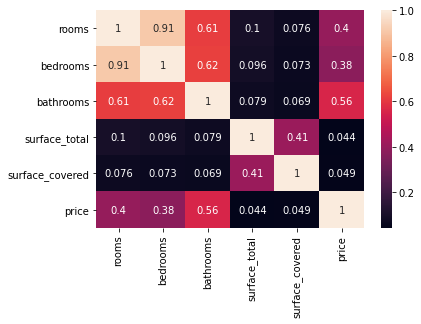

In [13]:
sns.heatmap(corr, cbar = True, annot = True )

#### Determinacion de Outliers

In [14]:
ds5.property_type.value_counts()

Departamento       92087
Casa               16040
PH                 13923
Oficina              355
Casa de campo        253
Otro                 108
Lote                  29
Local comercial       15
Depósito               6
Cochera                2
Name: property_type, dtype: int64

In [15]:
def set_outliers(p):
    ceil = p.mean()+3*(p.std())
    floor = p.mean()-3*(p.std())
    print("Max value: ", ceil)
    print("Min value: ", floor)
    print("The rest is not common")

In [16]:
deptos = ds5[ds5.property_type=="Departamento"]
set_outliers(deptos.bathrooms)
set_outliers(deptos._rooms)
set_outliers(deptos.surface_covered)
set_outliers(deptos.price)

Max value:  3.961606177097761
Min value:  -0.9314716304190764
The rest is not common


AttributeError: 'DataFrame' object has no attribute '_rooms'

En ninguno de estos casos tendremos valores negativos. Los limites inferiores se re definen de la siguiente manera:
* Cantidad minima de baños : 1
* Cantidad minima de rooms : 1
* Superficie minima : 35m2
* Precio minimo : 20 mil dolares

Los valores arrojados para surface_covered no son aceptables. Se determina como valor maximo 300m2

In [17]:
dptos_mask= ((ds5['property_type']=='Departamento')&
            (ds5['bathrooms']<=4)&
            (ds5['_rooms']<=3)&
            (ds5['surface_total']<=300)&
            (ds5['surface_total']>=20)&
            (ds5['price']<1000000))

plt.figure(figsize=(20, 10))

plt.subplot(3,1,1)
sns.boxplot(data = ds5[dptos_mask], x = 'surface_total')
plt.ylabel('Dpto', size = 30)

plt.subplot(3,1,2)
sns.boxplot(data = ds5[dptos_mask], x = 'price')
plt.ylabel('Dpto', size = 30)

plt.subplot(3,1,3)
sns.boxplot(data = ds5[dptos_mask], x = 'rooms')
plt.ylabel('Dpto', size = 30)

corr_dpto=ds5[dptos_mask].corr()

KeyError: '_rooms'

In [19]:
casas = ds5[ds5.property_type=="Casa"]
print("Bathrooms")
set_outliers(casas.bathrooms)
print("--------")
print("Rooms")
set_outliers(casas.rooms)
print("--------")
print("Surface covered")
set_outliers(casas.surface_covered)
print("--------")
print("Price")
set_outliers(casas.price)

Bathrooms
Max value:  5.45441970255803
Min value:  -1.2239957624084044
The rest is not common
--------
Rooms
Max value:  9.402690925735739
Min value:  -0.14097022748137356
The rest is not common
--------
Surface covered
Max value:  4111.253948363539
Min value:  -3620.520407216407
The rest is not common
--------
Price
Max value:  1183310.7219987195
Min value:  -630568.9829712881
The rest is not common


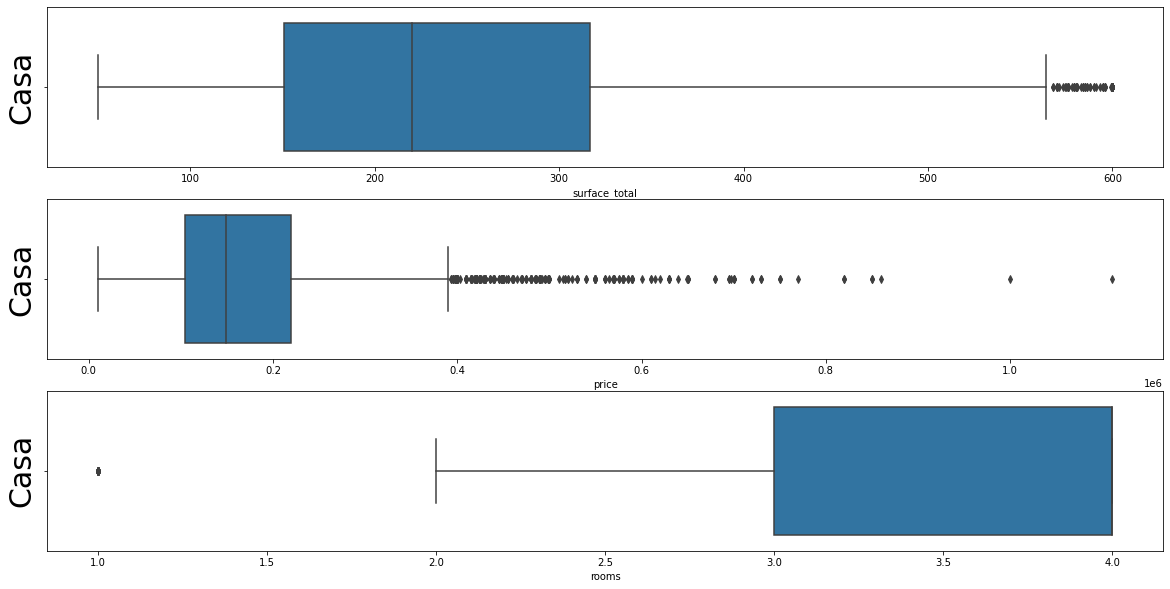

In [21]:
casa_mask= ((ds5['property_type']=='Casa')&
            (ds5['bathrooms']<=6)&
            (ds5['rooms']<=4)&
            (ds5['surface_total']<=600)&
            (ds5['surface_total']>=50)&
            (ds5['price']<1200000))

plt.figure(figsize=(20, 10))

plt.subplot(3,1,1)
sns.boxplot(data = ds5[casa_mask], x = 'surface_total')
plt.ylabel('Casa', size = 30)

plt.subplot(3,1,2)
sns.boxplot(data = ds5[casa_mask], x = 'price')
plt.ylabel('Casa', size = 30)

plt.subplot(3,1,3)
sns.boxplot(data = ds5[casa_mask], x = 'rooms')
plt.ylabel('Casa', size = 30)

corr_dpto=ds5[casa_mask].corr()

In [22]:
phs = ds5[ds5.property_type=="PH"]
print("Bathrooms")
set_outliers(phs.bathrooms)
print("--------")
print("Rooms")
set_outliers(phs._rooms)
print("--------")
print("Surface covered")
set_outliers(phs.surface_covered)
print("--------")
print("Price")
set_outliers(phs.price)

Bathrooms
Max value:  3.7249342455408465
Min value:  -0.7577576313054086
The rest is not common
--------
Rooms


AttributeError: 'DataFrame' object has no attribute '_rooms'

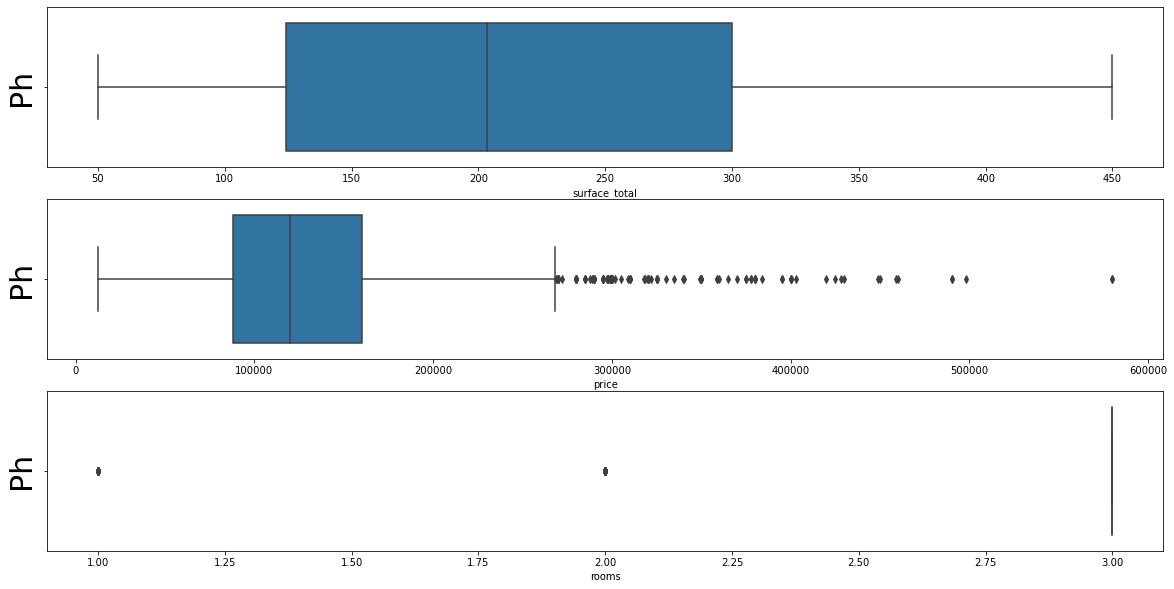

In [24]:
phs_mask= ((ds5['property_type']=='Casa')&
            (ds5['bathrooms']<=4)&
            (ds5['rooms']<=3)&
            (ds5['surface_total']<=450)&
            (ds5['surface_total']>=50)&
            (ds5['price']<600000))

plt.figure(figsize=(20, 10))

plt.subplot(3,1,1)
sns.boxplot(data = ds5[phs_mask], x = 'surface_total')
plt.ylabel('Ph', size = 30)

plt.subplot(3,1,2)
sns.boxplot(data = ds5[phs_mask], x = 'price')
plt.ylabel('Ph', size = 30)

plt.subplot(3,1,3)
sns.boxplot(data = ds5[phs_mask], x = 'rooms')
plt.ylabel('Ph', size = 30)

corr_dpto=ds5[phs_mask].corr()

### Encoding

In [25]:
enc = LabelEncoder()
l3_labels = enc.fit_transform(ds5["l3"])
#ds5.insert(7,"Enc_Barrio",l3_labels)
ds5.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


In [26]:
enc_property_type = pd.get_dummies(ds5.property_type, drop_first= True)
enc_property_type.index = ds5.index

In [27]:
ds5.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


In [28]:
ds5.drop("l2", axis = 1, inplace = True)
ds5.drop("l3", axis = 1, inplace = True)
ds5.drop("property_type", axis = 1, inplace = True)
ds5 = pd.concat([ds5, enc_property_type], axis=1)
ds5.head()

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa de campo,Cochera,Departamento,Depósito,Local comercial,Lote,Oficina,Otro,PH
0,7.0,7.0,2.0,140.0,140.0,153000.0,0,0,1,0,0,0,0,0,0
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,0,0,0,0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,0,0,0,0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,0,0,0,0,0,0,1
4,2.0,1.0,1.0,50.0,35.0,40000.0,0,0,0,0,0,0,0,0,1


#### Separacion de los datos

In [29]:
X=ds5.drop(("price"), axis=1)
y=ds5.price

X_Train, X_Test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

#### Escalado de los datos

In [32]:
#Separamos aquellos datos no numericos.
train_features = X_Train.loc[:,[ "bedrooms", "bathrooms", "surface_total", "surface_covered","rooms"]]
test_features = X_Test.loc[:,["bedrooms", "bathrooms", "surface_total", "surface_covered","rooms"]]

In [33]:
Scaler = MinMaxScaler()

In [34]:
train_features_scaled = Scaler.fit_transform(train_features)
test_features_scaled = Scaler.transform(test_features)

In [35]:
X_Train.loc[:,train_features.columns] = train_features_scaled
X_Test.loc[:,test_features.columns] = test_features_scaled

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [36]:
X_Train.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa de campo,Cochera,Departamento,Depósito,Local comercial,Lote,Oficina,Otro,PH
108494,0.088235,0.200000,0.000000,0.000740,0.000833,0,0,0,0,0,0,0,0,1
51377,0.029412,0.066667,0.000000,0.000349,0.000492,0,0,1,0,0,0,0,0,0
140986,0.088235,0.133333,0.076923,0.000681,0.000944,0,0,1,0,0,0,0,0,0
135215,0.000000,0.066667,0.000000,0.000059,0.000151,0,0,0,0,0,0,1,0,0
102308,0.058824,0.133333,0.000000,0.000325,0.000508,0,0,1,0,0,0,0,0,0


#### Reduccion de dimensionalidad

In [38]:
pca=PCA(n_components = 3)
x_train_pca = pca.fit_transform(X_Train.loc[:,["rooms","bathrooms", "bedrooms"]])
x_test_pca = pca.fit_transform(X_Test.loc[:,["rooms","bathrooms", "bedrooms"]])
x_train_pca = pd.DataFrame(x_train_pca)
x_test_pca=  pd.DataFrame(x_test_pca)

In [39]:
x_train_pca.index=X_Train.index
x_test_pca.index=X_Test.index

In [40]:
pca.explained_variance_ratio_

array([0.80562474, 0.1757817 , 0.01859356])

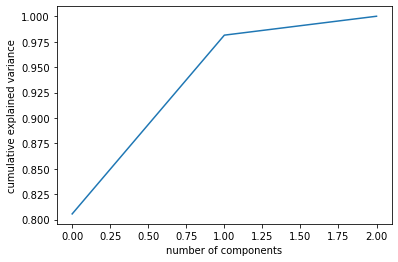

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

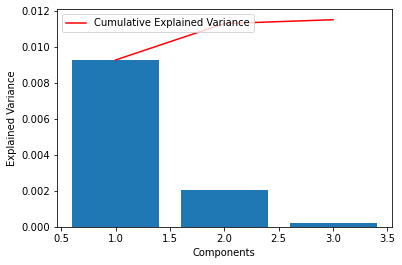

In [42]:
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

Por medio del grafico vemos que es conveniente reducir la cantidad de features a 2. Con dos componentes estamos explicando el 99% de la varianza de los datos.

In [43]:
pca2 = PCA(n_components=2)
x_train_pca2 = pca2.fit_transform(X_Train.loc[:,["rooms","bathrooms", "bedrooms"]])
x_test_pca2 = pca2.fit_transform(X_Test.loc[:,["rooms","bathrooms", "bedrooms"]])
x_train_pca2 = pd.DataFrame(x_train_pca2)
x_test_pca2 =  pd.DataFrame(x_test_pca2)

In [44]:
x_train_pca2.index=X_Train.index
x_test_pca2.index=X_Test.index

In [45]:
pca2.explained_variance_ratio_

array([0.80562474, 0.1757817 ])

In [839]:
X_Train = pd.concat([X_Train, x_train_pca2],axis=1)
X_Train.drop(["_rooms","rooms","bathrooms", "bedrooms"],axis=1,inplace=True)

X_Test = pd.concat([X_Test, x_test_pca2],axis=1)
X_Test.drop(["_rooms","rooms","bathrooms", "bedrooms"],axis=1,inplace=True)

In [840]:
X_Train

,surface_total,surface_covered,Departamento,PH,0,1
134041,0.000500,0.000571,1,0,-0.043311,0.040427
23785,0.000167,0.000262,1,0,-0.095802,-0.015971
95584,0.000754,0.000849,1,0,0.090311,0.020934
76279,0.000746,0.000508,0,1,-0.043311,0.040427
68778,0.000294,0.000341,1,0,-0.095802,-0.015971
...,...,...,...,...,...,...
10125,0.000690,0.000714,1,0,0.037820,-0.035463
93613,0.000278,0.000349,1,0,-0.095802,-0.015971
139383,0.000492,0.000587,1,0,-0.014671,-0.091861
1338,0.000420,0.000420,1,0,-0.095802,-0.015971


#### Benchmark, comparacion con modelo anterior

Proyecto 1:
* Err Arbol de decision Train para casa: 101399.73314919401
* Err Arbol de decision Test para casa: 105946.97077583065

#### Ahora vamos a ver que error obtenemos luego de procesar los datos de otra manera

In [841]:
d_tree= DecisionTreeRegressor(max_depth = 7, random_state = 42)
d_tree.fit(X_Train,y_train)
train_predict=d_tree.predict(X_Train)
test_predict=d_tree.predict(X_Test)

In [842]:
train_rmse2= np.sqrt(mean_squared_error(train_predict, y_train))
test_rmse2= np.sqrt(mean_squared_error(test_predict, y_test))
print('El error del train prop es',train_rmse2)
print('El error del test prop es',test_rmse2)

El error del train prop es 141132.03025034885
El error del test prop es 147965.95069785079


En el trabajo anterior habia creado un arbol para cada tipo de propiedad. Veamos que resultado obtenemos luego de separar aquells propiedades que son Casas

In [845]:
d_tree= DecisionTreeRegressor(max_depth = 7, random_state = 42)
d_tree.fit(X_Train,y_train)
mk2 = ((X_Train.PH==0) & (X_Train.Departamento==1))
mk3 = ((X_Test.PH==0) & (X_Test.Departamento==1))

train_predict=d_tree.predict(X_Train[mk2])
test_predict=d_tree.predict(X_Test[mk3])

mk2

134041     True
23785      True
95584      True
76279     False
68778      True
          ...  
10125      True
93613      True
139383     True
1338       True
26251      True
Length: 53539, dtype: bool

In [846]:
train_rmse2= np.sqrt(mean_squared_error(train_predict, y_train[mk2]))
test_rmse2= np.sqrt(mean_squared_error(test_predict, y_test[mk3]))
print('El error del train prop es',train_rmse2)
print('El error del test prop es',test_rmse2)

El error del train prop es 148317.2221536126
El error del test prop es 154163.93685834258
